In [1]:
%matplotlib inline

import sys
import pandas as pd
import os
import numpy as np

sys.path.insert(0, '..')
from glmhmm.glm_hmm import *
import matplotlib.pyplot as plt
from glmhmm.fitting import CrossValidation, GridSearch, mostProbSeq, FineTune, ShuffleControl
from preprocessing import utils2 as ut
from glmhmm.utils import find_last_non_nan_elements

#parentdir = '/Users/harshagurnani/Documents/GitHub/behavior-glm-hmm/'

## single session

In [2]:
file = '../example_data/sub_455220/sub-455220_ses-20190729T145044_trial_events.csv'

In [3]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(file, 3, True, 4)

Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 7 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 7 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0
Converged after 6 iterations
0.0


In [4]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[ 4.27214177e-03,  2.66982196e-04,  1.06795289e-03,
         3.11637941e-10,  2.40296740e-03,  1.06795243e-03,
         2.40296571e-03,  1.06794968e-03,  6.67561936e-03,
         4.27213938e-03],
       [ 4.27214060e-03,  2.66980290e-04,  1.06795144e-03,
        -1.30726905e-09,  2.40296593e-03,  1.06795084e-03,
         2.40296366e-03,  1.06794832e-03,  6.67561854e-03,
         4.27213717e-03],
       [ 4.27214177e-03,  2.66982394e-04,  1.06795174e-03,
        -2.48622800e-11,  2.40296770e-03,  1.06795176e-03,
         2.40296689e-03,  1.06794998e-03,  6.67561796e-03,
         4.27213964e-03]])

In [5]:
max_index = np.unravel_index(np.argmax(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]
pi0 = pi0_all[i,j]

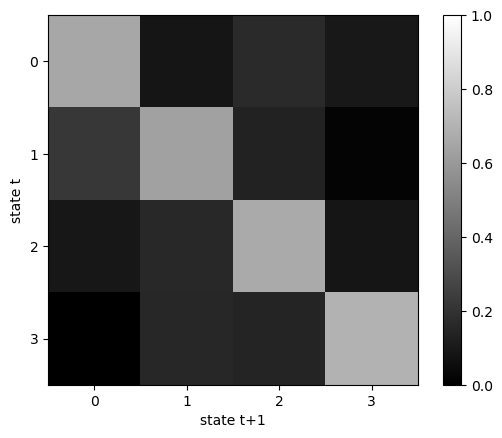

In [6]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

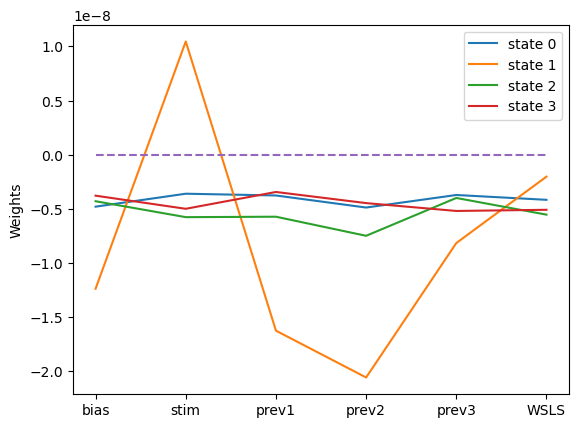

In [7]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
cmap = plt.get_cmap('Blues')
#=for i in range(3):
#    weight = w_all[i,j]
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))#, color=cmap(jj/nstates))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

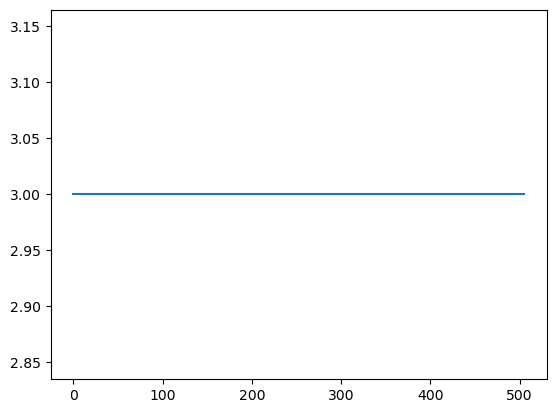

In [8]:
data = ut.Dataloader_sess(file, nprev = 3, exig = True)
X = data[:,1:-1]
y = data[:,-1]
bestpath = mostProbSeq(  y, A, pi0=np.ones(pi0.shape)/pi0.shape, phi=None, X=X, w=weight )
plt.plot(bestpath)

## single animal

In [2]:
folder = '../example_data/sub_455220/'
nprev=3
nlat=2
exig=True

data = ut.Dataloader_ani(folder, nprev = nprev, exig = exig)
X = data[:,1:-1]
y = data[:,-1]

In [3]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(folder, nprev, exig, nlat)

In [4]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[-0.02655359, -0.03304111, -0.01769105, -0.03151074, -0.03491475,
        -0.02333076, -0.02480355, -0.01229754, -0.04273827, -0.02576256],
       [-0.01487419, -0.05146029, -0.06050349, -0.04124395, -0.08904863,
        -0.02865786, -0.04323049, -0.03905763, -0.05881214, -0.08802815],
       [ 0.07319271,  0.05386231,  0.0743353 ,  0.07815859,  0.02357649,
         0.07628454,  0.05137705,  0.09381451,  0.04687495,  0.0632947 ]])

In [11]:
max_index = np.unravel_index(np.argmax(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]
pi0 = pi0_all[i,j]

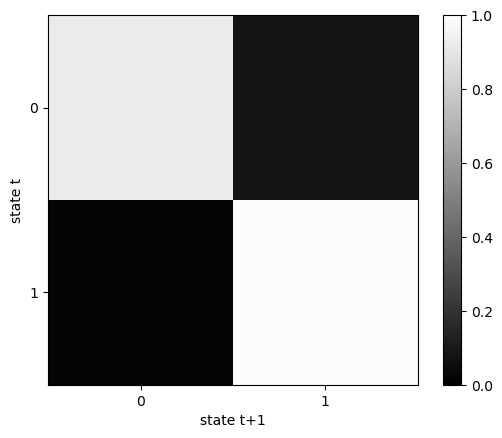

In [6]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

In [10]:
A

array([[0.92158783, 0.07841217],
       [0.01696072, 0.98303928]])

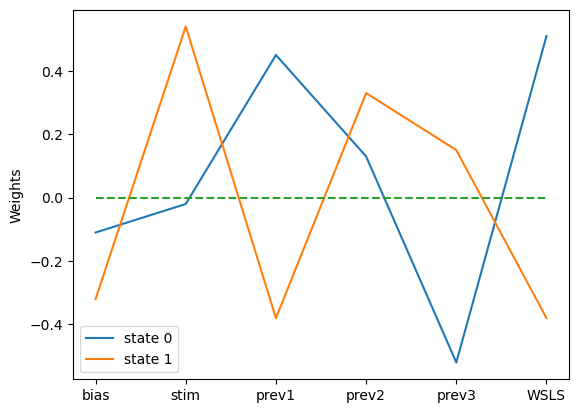

In [7]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

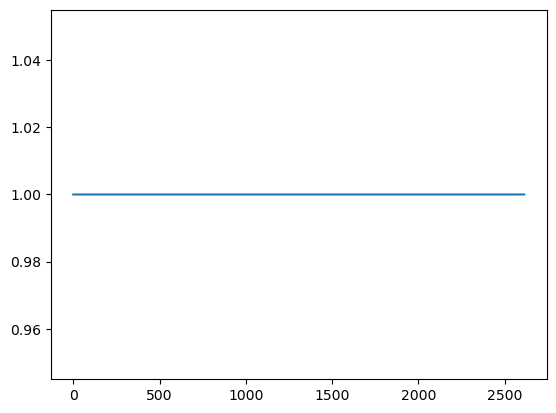

In [12]:
bestpath = mostProbSeq(  y, A, pi0=np.ones(pi0.shape)/pi0.shape, phi=None, X=X, w=weight )
plt.plot(bestpath)

## multiple animals

In [2]:
folder=None
nprev=3
exig=True
nlat=4
num_folds = 10
num_init = 1

In [3]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(folder, nprev, exig, nlat, num_folds=num_folds, num_init=num_init)

../example_data/sub_479121
../example_data/sub_455220
../example_data/sub_480928
../example_data/sub_455219


In [4]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[-0.00151649,  0.03678885,  0.00017951,  0.00176428,  0.00133141,
        -0.01117868,  0.01451417, -0.03874321, -0.02492185, -0.0199733 ]])

In [5]:
max_index = np.unravel_index(np.argmin(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]

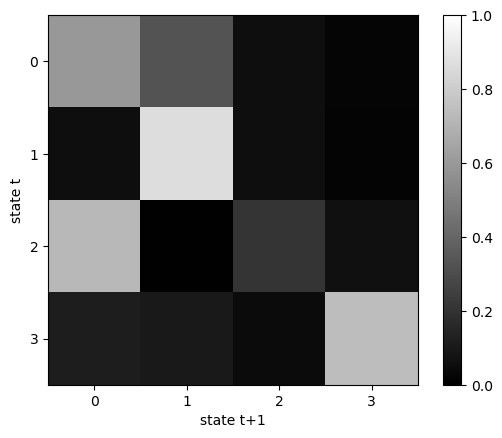

In [6]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

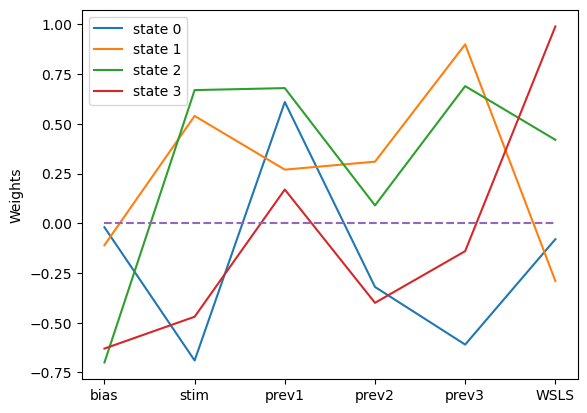

In [7]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

### finetune for single animal

In [9]:
folder='../example_data/sub_455220/'

In [31]:
wx = w_all[i,j][np.random.permutation(w_all[i,j].shape[0])]
wx2=wx.copy()



In [32]:
ll,A,w,pi0, X,y,_,_,_,_ = FineTune(folder, nprev=3, exig=True, num_latent=4,A_init=A,w_init=wx, tol=1e-6)

In [33]:
data = ut.Dataloader_ani(folder, nprev = 3, exig = True)
y = data[:,-1]
probR = np.sum(y)/len(y)
ll0 = np.log(probR) * np.sum(y) + np.log(1 - probR) * (len(y) - np.sum(y))
info = (ll - ll0)/(np.log(2)*y.shape[0])
info

array([0.10583095])

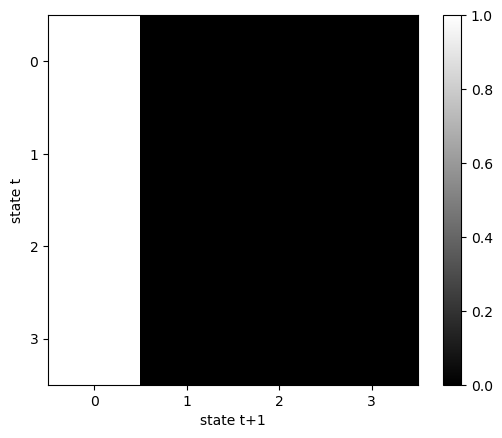

In [34]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

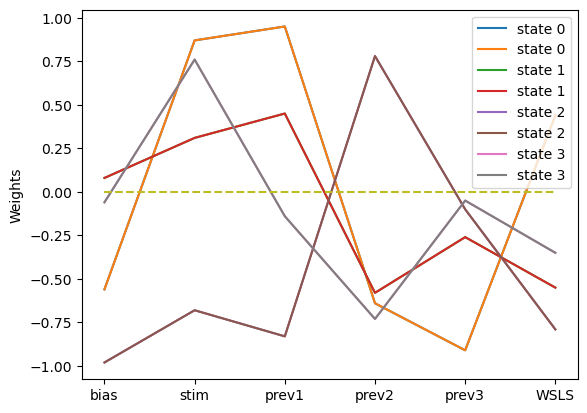

In [35]:
nstates = w.shape[0]
x = np.arange(1, w.shape[1] + 1)
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
    plt.plot(x, w[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

In [36]:
(w[:,:,1]-wx[:,:,1])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

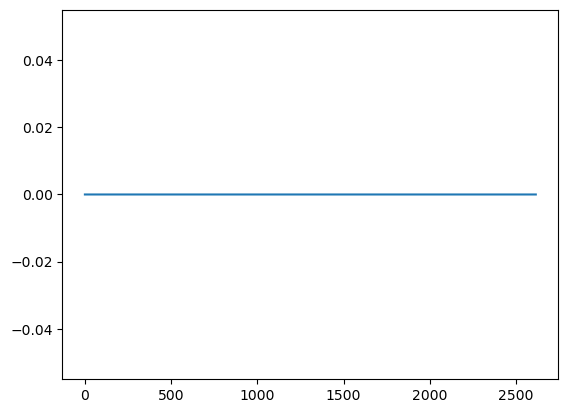

In [37]:
data = ut.Dataloader_ani(folder, nprev = 3, exig = True)
X = data[:,1:-1]
y = data[:,-1]
bestpath = mostProbSeq(  y, A, pi0=np.ones(pi0.shape)/pi0.shape, phi=None, X=X, w=weight )
plt.plot(bestpath)

## shuffle control

In [24]:
folder='../example_data/sub_479121/'
nprev=3
exig=True
nlat=4
num_folds = 5
num_init = 3

In [25]:
res_orig, res_shf_t, res_shf_X,train_size, test_size = ShuffleControl(folder, nprev=nprev, exig=exig, num_latent=nlat, num_init = num_init, num_folds=num_folds )

<BarContainer object of 1 artists>

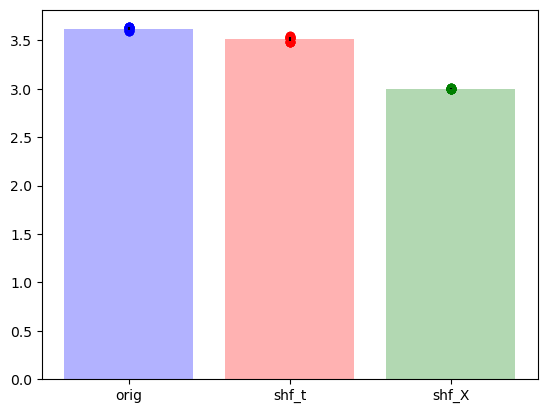

In [26]:
ll_orig = ( (res_orig['lls_test'][:]  - res_orig['ll0'][:] )/(np.log(2)*test_size) ).flatten()
ll_shf_t = ( (res_shf_t['lls_test'][:]  - res_shf_t['ll0'][:] )/(np.log(2)*test_size) ).flatten()
ll_shf_X = ( (res_shf_X['lls_test'][:]  - res_shf_X['ll0'][:] )/(np.log(2)*test_size) ).flatten()

plt.scatter( len(ll_orig)*['orig'], ll_orig, color='b')
plt.scatter( len(ll_shf_t)*['shf_t'], ll_shf_t, color='r')
plt.scatter( len(ll_shf_X)*['shf_X'], ll_shf_X, color='g')
plt.bar('orig', np.mean(ll_orig), yerr=np.std(ll_orig), color='b', alpha=0.3)
plt.bar('shf_t', np.mean(ll_shf_t), yerr=np.std(ll_shf_t), color='r', alpha=0.3)
plt.bar('shf_X', np.mean(ll_shf_X), yerr=np.std(ll_shf_X), color='g', alpha=0.3)

In [4]:
from glmhmm.glm import GLM


In [5]:
folder = '../example_data/sub_455220/'
data = ut.Dataloader_ani(folder, nprev = 3, exig = True)
x  = data[:,1:-1]
y = data[:,-1]

In [6]:
model = GLM(n=data.shape[0], d=data.shape[1]-2, c=2 ,observations='bernoulli')
winit = model.init_weights()
w, phi = model.fit(x,winit,y,compHess=True, gaussianPrior=1)

In [7]:
niters = 10
wall = np.zeros((niters, data.shape[1]-2, 2))
for jj in range(niters):   
    winit = model.init_weights()
    w, phi = model.fit(x,winit,y,compHess=True, gaussianPrior=1)
    wall[jj] = w

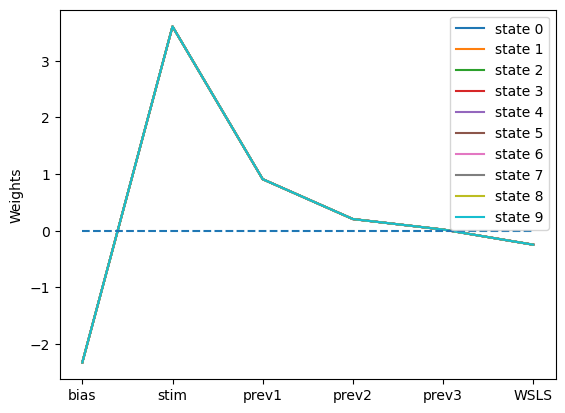

In [8]:

xx = np.arange(1, w.shape[0] + 1)
for jj in range(niters):   
    plt.plot(xx, wall[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(xx, [0]*len(xx), '--')
plt.xticks(xx, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

In [9]:
model = GLMHMM( n=data.shape[0], d=data.shape[1]-2, c=2, k=4, observations='bernoulli')

In [10]:
A_init,w_init,pi_init = model.generate_params() # initialize the model parameters
ll, A, w, pi0 = model.fit(y,x,A_init,w_init,pi0=pi_init, fit_init_states=True)

Converged after 113 iterations


In [12]:
niters = 3
wall = np.zeros((niters, 4, data.shape[1]-2, 2))
for jj in range(niters):   
    A_init,w_init,pi_init = model.generate_params() # initialize the model parameters
    ll, A, w, phi = model.fit(y,x,A_init,w_init,pi0=pi_init, fit_init_states=True)
    wall[jj] = w

Converged after 182 iterations


In [ ]:
xx = np.arange(1, w.shape[1] + 1)
for jj in range(niters):   
    for kk in range(4):
        plt.plot(xx, wall[jj,kk,:,1], label = 'state '+np.str_(kk))
plt.plot(xx, [0]*len(xx), '--')
plt.xticks(xx, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()